## 1. 필요한 라이브러리 다운로드

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. matplotlib에 한글 폰트 사용 설정

In [3]:
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [4]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
fontprop = fm.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name(), size=16)
fm._rebuild()

## 3. pandas를 활용하여 excel 파일 데이터 읽기

In [5]:
import pandas as pd

df = pd.read_excel('영화_위키피디아_최근5년.xlsx', sheet_name='2021')
df.head()

,순위,영화명,개봉일,개요,줄거리
0,1,스파이더맨: 노 웨이 홈,2021-12-15,《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 ...,전작 《스파이더맨: 파 프롬 홈》에서 미스테리오가 스파이더맨이 살인자라고 누명을 씌...
1,2,모가디슈,2021-07-28,"《모가디슈》는 2021년에 개봉한 대한민국의 영화이다. 류승완 감독의 작품으로, 7...",NaN
2,3,이터널스,2021-11-03,《이터널스》(영어: The Eternals)는 2021년 공개된 미국의 슈퍼히어로 ...,데비안츠라는 괴물들로부터 인류를 지키고 인류를 진화시키기 위해 신과 같은 존재인 셀...
3,4,블랙 위도우,2021-07-07,《블랙 위도우》(영어: Black Widow)는 2021년 개봉한 미국의 슈퍼히어로...,NaN
4,5,분노의 질주: 더 얼티메이트,2021-05-19,"""분노의 질주: 더 얼티메이트""(영어: F9)는 2021년 공개된 미국의 액션 영화...",도미닉(빈 디젤)은 자신과 가장 가까웠던 형제 제이콥(존 시나)이 사이퍼(샤를리즈 ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      30 non-null     int64         
 1   영화명     30 non-null     object        
 2   개봉일     30 non-null     datetime64[ns]
 3   개요      30 non-null     object        
 4   줄거리     26 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ KB


In [7]:
df_list = []
for year in ['2021', '2020', '2019', '2018', '2017']:
    df_tmp = pd.read_excel('영화_위키피디아_최근5년.xlsx', sheet_name=year)
    df_list.append(df_tmp)
len(df_list)

5

In [8]:
df_list[4].head()

,순위,영화명,개봉일,개요,줄거리
0,1,택시운전사,2017-08-02,"《택시운전사》는 2017년에 개봉한 대한민국의 영화이다. 실화를 바탕으로 하였으며,...","1980년 5월, 서울에서 택시기사일을 하며 하나 뿐인 딸과 착실하게 살아가는 만섭..."
1,2,신과함께-죄와 벌,2017-12-20,"《신과함께-죄와 벌》은 2017년 12월 20일에 개봉한 대한민국의 영화로, 주호민...",김자홍(차태현)이 삼차사와 49일 동안 7개의 지옥에서 7개의 재판을 받으며 자신의...
2,3,공조,2017-01-18,《공조》는 2017년에 개봉한 대한민국의 영화이다.,특수부대 출신 형사 림철령은 작전수행 도중 지원을 기다리자는 동료들의 말도 무시하고...
3,4,스파이더맨: 홈 커밍,2017-07-05,《스파이더맨: 홈커밍》(영어: Spider-Man: Homecoming)은 마블 코...,-
4,5,범죄도시,2017-10-03,"""범죄도시""는 2017년에 개봉한 대한민국의 영화이다.\n\n서울 구로구 가리봉동 ...","통쾌하고, 화끈하고, 살벌하게 나쁜놈들 때려잡는 강력반 형사들의 ‘조폭소탕작전’ 이..."


In [9]:
df = pd.concat(df_list)
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      150 non-null    int64         
 1   영화명     150 non-null    object        
 2   개봉일     150 non-null    datetime64[ns]
 3   개요      150 non-null    object        
 4   줄거리     146 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.0+ KB


In [11]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      146 non-null    int64         
 1   영화명     146 non-null    object        
 2   개봉일     146 non-null    datetime64[ns]
 3   개요      146 non-null    object        
 4   줄거리     146 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.8+ KB


In [12]:
df['text'] = df['개요'] + df['줄거리']
df.head()

,순위,영화명,개봉일,개요,줄거리,text
0,1,스파이더맨: 노 웨이 홈,2021-12-15,《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 ...,전작 《스파이더맨: 파 프롬 홈》에서 미스테리오가 스파이더맨이 살인자라고 누명을 씌...,《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 ...
1,3,이터널스,2021-11-03,《이터널스》(영어: The Eternals)는 2021년 공개된 미국의 슈퍼히어로 ...,데비안츠라는 괴물들로부터 인류를 지키고 인류를 진화시키기 위해 신과 같은 존재인 셀...,《이터널스》(영어: The Eternals)는 2021년 공개된 미국의 슈퍼히어로 ...
2,5,분노의 질주: 더 얼티메이트,2021-05-19,"""분노의 질주: 더 얼티메이트""(영어: F9)는 2021년 공개된 미국의 액션 영화...",도미닉(빈 디젤)은 자신과 가장 가까웠던 형제 제이콥(존 시나)이 사이퍼(샤를리즈 ...,"""분노의 질주: 더 얼티메이트""(영어: F9)는 2021년 공개된 미국의 액션 영화..."
3,6,싱크홀,2021-08-11,-,-,--
4,7,극장판 귀멸의 칼날: 무한열차편,2021-01-27,《극장판 귀멸의 칼날: 무한열차편》(일본어: 劇場版「鬼滅の刃」無限列車編 영어: De...,혈귀술로 사람들을 잠에 빠뜨리는 오니인 엔무(하현 1)가 무한열차에 나타나 탑승자들...,《극장판 귀멸의 칼날: 무한열차편》(일본어: 劇場版「鬼滅の刃」無限列車編 영어: De...


In [13]:
df['개요'][0]

'《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 2021년 개봉한 미국의 슈퍼히어로 영화이다. 2019년 영화 《스파이더맨: 파 프롬 홈》의 후속작이자, 마블 시네마틱 유니버스(MCU)의 27번째 작품이다. 감독은 전편과 같은 존 왓츠가 맡았으며, 각본 역시 전편에 참여했던 크리스 매케나와 에릭 소머즈가 맡았다.'

In [14]:
df['줄거리'][0]

'전작 《스파이더맨: 파 프롬 홈》에서 미스테리오가 스파이더맨이 살인자라고 누명을 씌우고, 정체를 공개한 장면부터 시작된다. 주변 사람들로부터 관심이 쏠린 피터 파커와 MJ는 웹스윙으로 현장을 벗어나 집으로 가지만, 집 근처에도 많은 사람들이 온다. 이후, 피터, MJ, 네드, 큰엄마 메이는 경찰에 조사받는다. 변호사 맷 머독이 증거불충분으로 기소되지는 않는다고 말하지만 대중들은 스파이더맨을 살인자라며 비난한다.\n\n미스테리오 때문에 자신의 일상이 엉망이 된 피터, 자신이 끌어들인 네드와 MJ까지 논란으로 인해 MIT 진학이 좌절되자 피터는 닥터 스트레인지를 찾아가 과거를 바꿔달라고 하지만 그는 거절한다. 대신 다른 사람들이 피터 파커가 스파이더맨이었다는 기억을 없애주기로 한다. 그러나 피터는 폭로 이전에 자신의 정체를 알던 이들은 예외로 해달라며 주문을 방해하고 스트레인지의 마법은 실패한다. 이로 인해 오히려 스파이더맨의 정체를 알던 평행우주의 인물들이 넘어오게 된다.\n\n피터는 플래시 톰슨의 도움으로 MIT에 한 번 더 기회를 요청하기 위해 공항으로 가던 부총장보를 만나려 한다. 부총장보를 만났지만 갑자기 도로에서 스파이더맨: 트릴로지2의 닥터 옥토퍼스가 나타난다. 피터는 닥터 옥토퍼스를 제압하고 부총장보에게 입학 허가를 받았지만, 2002년 작 스파이더맨의 그린 고블린이 나타난다. 그 때 닥터 스트레인지의 도움으로 생텀으로 온 피터는 닥터 옥토퍼스와 함께 잡혀 있던 어메이징 스파이더맨의 리저드도 보게 된다. 스트레인지는 평행우주의 인물들을 막으려 했지만 일부가 우리 차원으로 넘어왔다고 말하며 피터에게 사건 해결을 촉구한다.\n\n네드와 MJ의 도움으로 스파이더맨 3의 샌드맨과 어메이징 스파이더맨 2의 일렉트로를 만나고 둘을 모두 잡게 된다. 사악한 그린 고블린의 인격에서 잠시 벗어난 노먼 오스본은 메이의 일터로 가고, 피터와 함께 생텀의 지하로 간다. 닥터 스트레인지는 그들을 되돌려 보내려고 하지만, 죽을 운명이었던 스파이더맨의 숙적들을 지키기 위해 

In [15]:
df['text'][0]

'《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 2021년 개봉한 미국의 슈퍼히어로 영화이다. 2019년 영화 《스파이더맨: 파 프롬 홈》의 후속작이자, 마블 시네마틱 유니버스(MCU)의 27번째 작품이다. 감독은 전편과 같은 존 왓츠가 맡았으며, 각본 역시 전편에 참여했던 크리스 매케나와 에릭 소머즈가 맡았다.전작 《스파이더맨: 파 프롬 홈》에서 미스테리오가 스파이더맨이 살인자라고 누명을 씌우고, 정체를 공개한 장면부터 시작된다. 주변 사람들로부터 관심이 쏠린 피터 파커와 MJ는 웹스윙으로 현장을 벗어나 집으로 가지만, 집 근처에도 많은 사람들이 온다. 이후, 피터, MJ, 네드, 큰엄마 메이는 경찰에 조사받는다. 변호사 맷 머독이 증거불충분으로 기소되지는 않는다고 말하지만 대중들은 스파이더맨을 살인자라며 비난한다.\n\n미스테리오 때문에 자신의 일상이 엉망이 된 피터, 자신이 끌어들인 네드와 MJ까지 논란으로 인해 MIT 진학이 좌절되자 피터는 닥터 스트레인지를 찾아가 과거를 바꿔달라고 하지만 그는 거절한다. 대신 다른 사람들이 피터 파커가 스파이더맨이었다는 기억을 없애주기로 한다. 그러나 피터는 폭로 이전에 자신의 정체를 알던 이들은 예외로 해달라며 주문을 방해하고 스트레인지의 마법은 실패한다. 이로 인해 오히려 스파이더맨의 정체를 알던 평행우주의 인물들이 넘어오게 된다.\n\n피터는 플래시 톰슨의 도움으로 MIT에 한 번 더 기회를 요청하기 위해 공항으로 가던 부총장보를 만나려 한다. 부총장보를 만났지만 갑자기 도로에서 스파이더맨: 트릴로지2의 닥터 옥토퍼스가 나타난다. 피터는 닥터 옥토퍼스를 제압하고 부총장보에게 입학 허가를 받았지만, 2002년 작 스파이더맨의 그린 고블린이 나타난다. 그 때 닥터 스트레인지의 도움으로 생텀으로 온 피터는 닥터 옥토퍼스와 함께 잡혀 있던 어메이징 스파이더맨의 리저드도 보게 된다. 스트레인지는 평행우주의 인물들을 막으려 했지만 일부가 우리 차원으로 넘어왔다고 말하며 피터에게 사건 해결

## 4. 분리하지 않기 원하는 단어 설정

In [16]:
from konlpy.tag import Okt
okt = Okt()
okt.pos('닥터 스트레인지는 스파이더맨에 나온다.')

[('닥터', 'Noun'),
 ('스트레인지', 'Noun'),
 ('는', 'Josa'),
 ('스파이더맨', 'Noun'),
 ('에', 'Josa'),
 ('나온다', 'Verb'),
 ('.', 'Punctuation')]

In [17]:
import os
os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java')
os.getcwd()

'/usr/local/lib/python3.8/dist-packages/konlpy/java'

In [18]:
import konlpy
konlpy.__path__

['/usr/local/lib/python3.8/dist-packages/konlpy']

In [19]:
!mkdir tmp

mkdir: cannot create directory ‘tmp’: File exists


In [20]:
os.chdir('/usr/local/lib/python3.8/dist-packages/konlpy/java/tmp')
os.getcwd()

'/usr/local/lib/python3.8/dist-packages/konlpy/java/tmp'

In [21]:
!ls ../

aho-corasick.jar     kkma-2.0.jar		 shineware-ds-1.0.jar
bin		     komoran-3.0.jar		 snakeyaml-1.12.jar
conf		     open-korean-text-2.1.0.jar  tmp
data		     scala-library-2.12.3.jar	 twitter-text-1.14.7.jar
jhannanum-0.8.4.jar  shineware-common-1.0.jar


In [22]:
!jar xvf ../open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: META-INF/maven/
  created: META-INF/maven/org.openkoreantext/
  created: META-INF/maven/org.openkoreantext/open-korean-text/
 inflated: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties
 inflated: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
 inflated: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class
  created: org/openkoreantext/processor/normalizer/
 inflated: org/openkoreantext/processor/normalizer/KoreanNormalizer$.class
 inflated: org/openkoreantext/processor/normalizer/KoreanNormalizer.class
 inflated: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment.class
 inflated: org/openkoreantext/processor/normalizer/KoreanNormalizer$Segment$.class
  created: org/openkoreantext/processor/tokenizer/
 inflated: org/openkoreantext/processor/tokenizer/KoreanDetokenizer.class
 inflated: 

In [23]:
with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/tmp/org/openkoreantext/processor/util/noun/names.txt") as f:
    names = f.read()
names

'가몽\n가온\n갓세븐\n강새이\n게임닉가\n관우\n귀여미\n규\n김유이\n김준면\n까까런\n노컷\n누너예\n니노\n다마고치\n다이무스\n대학생\n데이브\n도요토미\n동운\n동이\n두주니\n디시인사이드\n디오\n라몹\n라스\n라옵\n멍구\n메이든\n명덕\n명량\n문민정부\n미네\n방엘리\n병헌\n붓다\n비정상회담\n빼빼로\n삼풍\n샤인온미\n성식\n성열\n세라문\n세라복\n세종대왕\n손권\n손책\n쇼미더머니\n쇼챔\n순규\n스라소니\n신동아\n신쓰패밀리\n신아라\n아베\n안상홍\n안홍준\n여누\n여랑\n여포\n연합\n오꾸닭\n요섭\n웃찾사\n원식\n유병언\n유비\n유이\n윤기형\n이나단\n이명박\n이완용\n임창용\n자괴\n자니윤\n자대련\n자유\n재중이\n전교조\n정윤회\n제갈량\n조자룡\n조조\n준면\n지오디\n지존파\n진영오\n차작가\n차트\n창섭\n챠트\n첸\n코르사주\n하무열\n하용파쿠\n혁재\n현이\n현태\n혜미\n닥터 스트레인지\n옥토퍼스\n스트레인지\n옥토퍼스\n'

In [24]:
names += '스트레인지\n'
names += '옥토퍼스\n'

In [25]:
with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/tmp/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(names)

In [26]:
!jar cvf ../open-korean-text-2.1.0.jar *

added manifest
ignoring entry META-INF/
ignoring entry META-INF/MANIFEST.MF
adding: META-INF/maven/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/(in = 0) (out= 0)(stored 0%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.properties(in = 119) (out= 110)(deflated 7%)
adding: META-INF/maven/org.openkoreantext/open-korean-text/pom.xml(in = 9127) (out= 2208)(deflated 75%)
adding: org/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/OpenKoreanTextProcessorJava.class(in = 5901) (out= 1995)(deflated 66%)
adding: org/openkoreantext/processor/normalizer/(in = 0) (out= 0)(stored 0%)
adding: org/openkoreantext/processor/normalizer/KoreanNormalizer$.class(in = 11553) (out= 5102)(deflated 55%)
adding: org/openkoreantext/processor/normal

In [27]:
okt.pos('닥터 스트레인지는 스파이더맨에 나온다.')

[('닥터', 'Noun'),
 ('스트레인지', 'Noun'),
 ('는', 'Josa'),
 ('스파이더맨', 'Noun'),
 ('에', 'Josa'),
 ('나온다', 'Verb'),
 ('.', 'Punctuation')]

## 5. 영화 한 개에 대한 빈도 분석과 워드 클라우드

In [28]:
one_text = df['text'][0]
one_text

'《스파이더맨: 노 웨이 홈》(영어: Spider-Man: No Way Home)은 2021년 개봉한 미국의 슈퍼히어로 영화이다. 2019년 영화 《스파이더맨: 파 프롬 홈》의 후속작이자, 마블 시네마틱 유니버스(MCU)의 27번째 작품이다. 감독은 전편과 같은 존 왓츠가 맡았으며, 각본 역시 전편에 참여했던 크리스 매케나와 에릭 소머즈가 맡았다.전작 《스파이더맨: 파 프롬 홈》에서 미스테리오가 스파이더맨이 살인자라고 누명을 씌우고, 정체를 공개한 장면부터 시작된다. 주변 사람들로부터 관심이 쏠린 피터 파커와 MJ는 웹스윙으로 현장을 벗어나 집으로 가지만, 집 근처에도 많은 사람들이 온다. 이후, 피터, MJ, 네드, 큰엄마 메이는 경찰에 조사받는다. 변호사 맷 머독이 증거불충분으로 기소되지는 않는다고 말하지만 대중들은 스파이더맨을 살인자라며 비난한다.\n\n미스테리오 때문에 자신의 일상이 엉망이 된 피터, 자신이 끌어들인 네드와 MJ까지 논란으로 인해 MIT 진학이 좌절되자 피터는 닥터 스트레인지를 찾아가 과거를 바꿔달라고 하지만 그는 거절한다. 대신 다른 사람들이 피터 파커가 스파이더맨이었다는 기억을 없애주기로 한다. 그러나 피터는 폭로 이전에 자신의 정체를 알던 이들은 예외로 해달라며 주문을 방해하고 스트레인지의 마법은 실패한다. 이로 인해 오히려 스파이더맨의 정체를 알던 평행우주의 인물들이 넘어오게 된다.\n\n피터는 플래시 톰슨의 도움으로 MIT에 한 번 더 기회를 요청하기 위해 공항으로 가던 부총장보를 만나려 한다. 부총장보를 만났지만 갑자기 도로에서 스파이더맨: 트릴로지2의 닥터 옥토퍼스가 나타난다. 피터는 닥터 옥토퍼스를 제압하고 부총장보에게 입학 허가를 받았지만, 2002년 작 스파이더맨의 그린 고블린이 나타난다. 그 때 닥터 스트레인지의 도움으로 생텀으로 온 피터는 닥터 옥토퍼스와 함께 잡혀 있던 어메이징 스파이더맨의 리저드도 보게 된다. 스트레인지는 평행우주의 인물들을 막으려 했지만 일부가 우리 차원으로 넘어왔다고 말하며 피터에게 사건 해결

In [29]:
one_text_tokenized = okt.morphs(one_text)
one_text_tokenized[:12]

['《', '스파이더맨', ':', '노', '웨이', '홈', '》', '(', '영어', ':', 'Spider', '-']

In [30]:
one_text_tokenized = okt.nouns(one_text)
one_text_tokenized[:12]

['스파이더맨', '노', '웨이', '홈', '영어', '은', '개봉', '미국', '슈퍼히어로', '영화', '영화', '스파이더맨']

In [31]:
df_word_count = pd.DataFrame()
word_cloud_dict = {}

word_list = list(set(one_text_tokenized))
word_cnt_list = []

In [32]:
from tqdm import tqdm

for word in tqdm(word_list):
    word_cnt = one_text_tokenized.count(word)
    word_cnt_list.append(word_cnt)
    if len(word) == 1:
        continue
    word_cloud_dict[word] = word_cnt

100%|██████████| 251/251 [00:00<00:00, 44650.53it/s]


In [33]:
df_word_count['word'] = word_list
df_word_count['word_cnt'] = word_cnt_list
df_word_count = df_word_count.sort_values('word_cnt', ascending=False)
df_word_count.head(30)

,word,word_cnt
15,피터,34
66,스파이더맨,29
81,스트레인지,12
39,닥터,11
94,고블린,9
47,그린,9
7,말,9
161,그,9
84,자신,8
173,의,8


In [34]:
from wordcloud import WordCloud

word_cloud = WordCloud(font_path=font_path, width=1000, height=600)
word_cloud.generate_from_frequencies(word_cloud_dict)

In [35]:
import matplotlib.pyplot as plt
word_cloud_array = word_cloud.to_array()
word_cloud_array.shape

(600, 1000, 3)

(-0.5, 999.5, 599.5, -0.5)

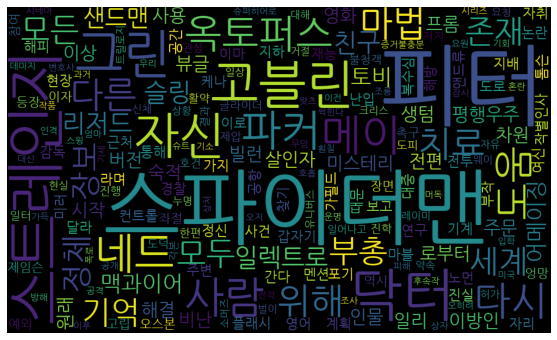

In [36]:
plt.figure(figsize=(12, 6))
plt.imshow(word_cloud_array)
plt.axis('off') # 축 제거